In [1]:
import numpy as np
import pandas, seaborn
import matplotlib.pyplot as plt

In [2]:
data1 = pandas.read_csv("SAIDI1-UNIFORM-CR100.csv", sep=',', engine='c', dtype=str)
print(data1.head())

          Run1         Run2         Run3         Run4         Run5
0  1.22895e-06  1.26912e-06  1.28201e-06  1.22634e-06  1.21767e-06
1  1.25112e-06  1.32547e-06  1.28348e-06  1.30802e-06  1.24232e-06
2  1.32193e-06  1.31347e-06  1.29157e-06  1.30001e-06  1.32906e-06
3  1.31346e-06  1.32646e-06  1.29782e-06  1.34013e-06  1.30065e-06
4  1.39427e-06   1.3453e-06  1.32803e-06  1.39783e-06  1.33238e-06


In [3]:
def fitness_to_cost(df):
    new_dict = {}
    for col in df:
        _a = np.array(df[col], dtype=float)
        new_dict[col] = 1/_a
    return pandas.DataFrame(new_dict)

In [4]:
def get_meanstd(df) -> pandas.DataFrame:
    new_data = {
        "mean": np.array([], dtype=float),
        "std": np.array([], dtype=float)
    }
    
    for i in df.index:
        _aux = [ df[col][i] for col in df ]
        new_data["mean"] = np.append(new_data["mean"], np.mean(_aux))
        new_data["std"] = np.append(new_data["std"], np.std(_aux))
        
    return pandas.DataFrame(new_data)

In [5]:
def bdAll(filename):
    df1 = pandas.read_csv(filename, sep=',', engine='c', dtype=str)
    df2 = fitness_to_cost(df1)
    df3 = get_meanstd(df2)
    return df3

In [18]:
def plot_all(df1, df2, df3):
    dataframes = {"1P": df1, "8P": df2, "32P": df3}
    colors = {"1P": "red", "8P": "blue", "32P": "green"}

    fig, ax = plt.subplots(figsize=(8,6))
    for name in dataframes:
        ax.plot(np.arange(1,101), dataframes[name]["mean"], color=colors[name], lw=2, label=name)

    ax.set_title("Usando taxa de cruzamento de 100%")
    ax.set_ylabel("Melhor solução (Média das 5 execuções)")
    ax.set_xlabel("Geração")
    ax.legend(fontsize=16)
    
    return fig, ax

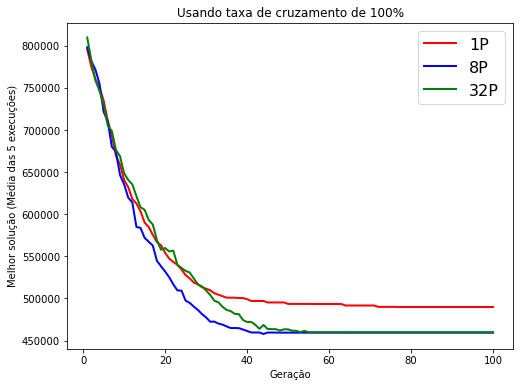

In [25]:
saidi1_1p = bdAll("SAIDI1_1P_CR100.csv")
saidi1_8p = bdAll("SAIDI1_8P_CR100.csv")
saidi1_32p = bdAll("SAIDI1_32P_CR100.csv")

f, a = plot_all(saidi1_1p, saidi1_8p, saidi1_32p)
f.savefig("SAIDI1_CR100.jpg")

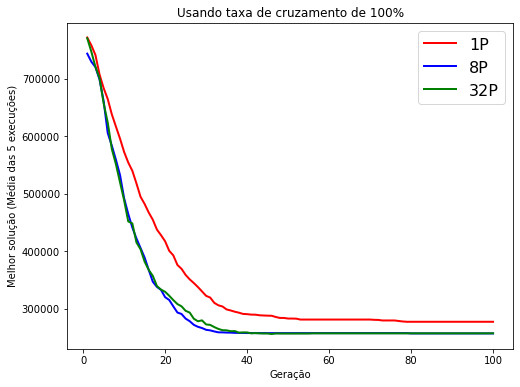

In [26]:
saidi5_1p = bdAll("SAIDI5_1P_CR100.csv")
saidi5_8p = bdAll("SAIDI5_8P_CR100.csv")
saidi5_32p = bdAll("SAIDI5_32P_CR100.csv")

f, a = plot_all(saidi5_1p, saidi5_8p, saidi5_32p)
f.savefig("SAIDI5_CR100.jpg")

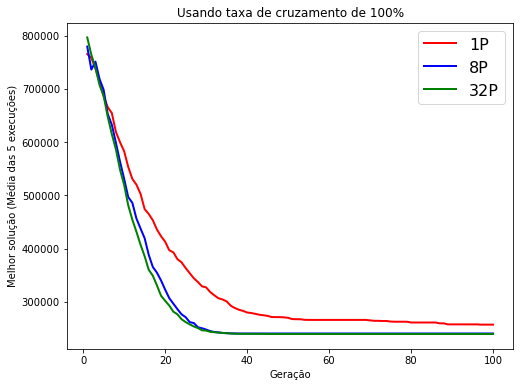

In [27]:
saidi10_1p = bdAll("SAIDI10_1P_CR100.csv")
saidi10_8p = bdAll("SAIDI10_8P_CR100.csv")
saidi10_32p = bdAll("SAIDI10_32P_CR100.csv")

f, a = plot_all(saidi10_1p, saidi10_8p, saidi10_32p)
f.savefig("SAIDI10_CR100.jpg")